In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import seaborn as sns

In [2]:
raw_df = pd.read_csv('data\cleaned_real_estate_data.csv')
raw_df.describe()

,id,bedroomCount,bathroomCount,postCode,habitableSurface,buildingConstructionYear,facedeCount,landSurface,toiletCount,price,totalParkingCount
count,7.610300e+04,72936.000000,66399.000000,76103.000000,67585.000000,48962.000000,53025.000000,39340.000000,54309.000000,7.610300e+04,75292.000000
mean,1.965954e+07,2.932982,1.384012,5226.748367,177.456788,1977.988277,2.825026,1273.367285,1.690309,4.351276e+05,0.991433
std,2.716066e+06,1.331029,0.837864,3040.843310,820.491723,41.603212,0.941269,5566.892520,0.831790,4.127531e+05,1.614135
min,1.882546e+06,1.000000,1.000000,1000.000000,6.000000,1753.000000,1.000000,1.000000,1.000000,5.000000e+04,0.000000
25%,2.036992e+07,2.000000,1.000000,2300.000000,93.000000,1957.000000,2.000000,217.000000,1.000000,2.310000e+05,0.000000
50%,2.053473e+07,3.000000,1.000000,4790.000000,140.000000,1979.000000,3.000000,460.000000,2.000000,3.295000e+05,0.000000
75%,2.061657e+07,4.000000,2.000000,8400.000000,200.000000,2017.000000,4.000000,959.000000,2.000000,4.790000e+05,1.000000
max,2.066439e+07,10.000000,10.000000,9992.000000,185347.000000,2055.000000,86.000000,580608.000000,5.000000,5.000000e+06,10.000000


In [3]:
raw_df= raw_df.drop(columns =['id'])

In [ ]:
raw_df.columns

In [4]:
### Transforming column types
#### Boolean Columns
boolean_cols = raw_df.columns[raw_df.columns.str.startswith('has')]
print(boolean_cols)
for col in boolean_cols:
    raw_df[col]= raw_df[col].astype("boolean")

Index(['hasAttic', 'hasBasement', 'hasDressingRoom', 'hasDiningRoom',
       'hasLift', 'hasHeatPump', 'hasPhotovoltaicPanels', 'hasLivingRoom',
       'hasGarden', 'hasAirConditioning', 'hasArmoredDoor', 'hasVisiophone',
       'hasOffice', 'hasSwimmingPool', 'hasFireplace', 'hasTerrace'],
      dtype='object')


In [5]:
numerical_cols = raw_df.select_dtypes(['float64','int64'])
numerical_cols = numerical_cols.drop(columns= ['postCode'])



In [6]:
numerical_cols


,bedroomCount,bathroomCount,habitableSurface,buildingConstructionYear,facedeCount,landSurface,toiletCount,price,totalParkingCount
0,2.0,1.0,100.0,2004.0,1.0,NaN,1.0,399000.0,1.0
1,4.0,2.0,270.0,1910.0,2.0,209.0,3.0,895000.0,0.0
2,2.0,1.0,87.0,1970.0,2.0,NaN,1.0,465000.0,0.0
3,2.0,2.0,104.0,2018.0,NaN,NaN,2.0,590000.0,0.0
4,1.0,1.0,71.0,1906.0,2.0,NaN,1.0,289000.0,0.0
...,...,...,...,...,...,...,...,...,...
76098,4.0,2.0,242.0,2025.0,4.0,562.0,NaN,649000.0,3.0
76099,3.0,1.0,94.0,1970.0,4.0,NaN,1.0,279000.0,0.0
76100,3.0,1.0,113.0,1964.0,NaN,NaN,1.0,299000.0,0.0
76101,3.0,2.0,111.0,NaN,NaN,NaN,2.0,325000.0,0.0


In [7]:
numerical_cols[['bedroomCount', 'bathroomCount', 'buildingConstructionYear', 'facedeCount', 'toiletCount','totalParkingCount' ]].astype('Int64')

,bedroomCount,bathroomCount,buildingConstructionYear,facedeCount,toiletCount,totalParkingCount
0,2,1,2004,1,1,1
1,4,2,1910,2,3,0
2,2,1,1970,2,1,0
3,2,2,2018,<NA>,2,0
4,1,1,1906,2,1,0
...,...,...,...,...,...,...
76098,4,2,2025,4,<NA>,3
76099,3,1,1970,4,1,0
76100,3,1,1964,<NA>,1,0
76101,3,2,<NA>,<NA>,2,0


In [8]:
categorical_cols = raw_df.select_dtypes(['object'])
for col in categorical_cols:
    raw_df[col]= raw_df[col].astype("category")

raw_df['postCode']= raw_df['postCode'].astype("category")

#### Getting rid of price outliers

In [9]:
def remove_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[col] >= lower) & (df[col] <= upper)]

In [10]:
raw_df['price'].describe()

count    7.610300e+04
mean     4.351276e+05
std      4.127531e+05
min      5.000000e+04
25%      2.310000e+05
50%      3.295000e+05
75%      4.790000e+05
max      5.000000e+06
Name: price, dtype: float64

In [11]:
df_wo_out =  remove_outliers_iqr(raw_df, 'price')

In [12]:
df_wo_out['price'].describe()

count     70206.000000
mean     343889.518118
std      163700.495823
min       50000.000000
25%      225000.000000
50%      314000.000000
75%      430000.000000
max      850000.000000
Name: price, dtype: float64

##### Getting rid of habitableSurface outliers

In [13]:
# identifying properties with 10000 as habitable surface
df_wo_out = df_wo_out[df_wo_out['habitableSurface'] <= 5000]
df_wo_out

,type,subtype,bedroomCount,bathroomCount,province,locality,postCode,habitableSurface,hasAttic,hasBasement,...,hasArmoredDoor,hasVisiophone,hasOffice,toiletCount,hasSwimmingPool,hasFireplace,hasTerrace,epcScore,price,totalParkingCount
0,APARTMENT,APARTMENT,2.0,1.0,Brussels,Etterbeek,1040,100.0,False,True,...,False,True,False,1.0,False,False,True,C,399000.0,1.0
2,APARTMENT,APARTMENT,2.0,1.0,Brussels,Etterbeek,1040,87.0,False,False,...,False,False,False,1.0,False,False,True,F,465000.0,0.0
3,APARTMENT,APARTMENT,2.0,2.0,Brussels,Bruxelles,1040,104.0,False,False,...,True,True,False,2.0,False,False,True,B,590000.0,0.0
4,APARTMENT,FLAT_STUDIO,1.0,1.0,Brussels,Etterbeek,1040,71.0,False,False,...,False,False,False,1.0,False,False,False,E,289000.0,0.0
5,APARTMENT,APARTMENT,2.0,1.0,Brussels,Etterbeek,1040,90.0,False,True,...,False,False,False,1.0,False,False,True,D,375000.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76098,HOUSE,HOUSE,4.0,2.0,EastFlanders,Maldegem,9990,242.0,False,False,...,False,False,False,NaN,True,False,False,NaN,649000.0,3.0
76099,APARTMENT,APARTMENT,3.0,1.0,Brussels,Jette,1090,94.0,False,True,...,False,True,False,1.0,False,False,True,D,279000.0,0.0
76100,APARTMENT,APARTMENT,3.0,1.0,FlemishBrabant,GrimbergenStrombeek-Bever,1853,113.0,False,True,...,False,False,False,1.0,False,False,True,B,299000.0,0.0
76101,APARTMENT,APARTMENT,3.0,2.0,WestFlanders,Westende,8434,111.0,False,False,...,False,False,False,2.0,False,False,True,A,325000.0,0.0


#### Reviewing columns for imputation

In [14]:
df_wo_out.isna().sum()

type                            0
subtype                         0
bedroomCount                 1923
bathroomCount                6563
province                        0
locality                        0
postCode                        0
habitableSurface                0
hasAttic                        0
hasBasement                     0
hasDressingRoom                 0
hasDiningRoom                   0
buildingCondition           14408
buildingConstructionYear    21043
facedeCount                 18125
hasLift                         0
floodZoneType               26731
hasHeatPump                     0
hasPhotovoltaicPanels           0
kitchenType                 26432
landSurface                 30418
hasLivingRoom                   0
hasGarden                       0
hasAirConditioning              0
hasArmoredDoor                  0
hasVisiophone                   0
hasOffice                       0
toiletCount                 15643
hasSwimmingPool                 0
hasFireplace  

In [15]:
df_small = df_wo_out.drop(columns=['locality', 'floodZoneType'])

## Imputing with KNN Imputator

In [16]:
num_cols = df_small.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_order_cols = ['epcScore']
cat_cols = df_small.select_dtypes(include=['category', 'object']).columns.tolist()
cat_cols.remove('epcScore')
bool_cols = df_small.select_dtypes(include=['bool']).columns.tolist()

In [17]:
num_cols

['bedroomCount',
 'bathroomCount',
 'habitableSurface',
 'buildingConstructionYear',
 'facedeCount',
 'landSurface',
 'toiletCount',
 'price',
 'totalParkingCount']

In [18]:
print(cat_cols)

['type', 'subtype', 'province', 'postCode', 'buildingCondition', 'kitchenType']


In [19]:
bool_cols

['hasAttic',
 'hasBasement',
 'hasDressingRoom',
 'hasDiningRoom',
 'hasLift',
 'hasHeatPump',
 'hasPhotovoltaicPanels',
 'hasLivingRoom',
 'hasGarden',
 'hasAirConditioning',
 'hasArmoredDoor',
 'hasVisiophone',
 'hasOffice',
 'hasSwimmingPool',
 'hasFireplace',
 'hasTerrace']

In [20]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [21]:
ordinal_encoder = OrdinalEncoder(categories=[['A', 'B', 'C', 'D', 'E', 'F', 'G']],
                                 handle_unknown='use_encoded_value', unknown_value=-1)
onehot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [22]:
preprocessor = ColumnTransformer([
    ('num', KNNImputer(n_neighbors=5), num_cols),
    ('ordered_cat', Pipeline([
        ('encode', ordinal_encoder),
        ('impute', KNNImputer(n_neighbors=5))
    ]), cat_order_cols),
    ('nominal_cat', Pipeline([
        ('encode', onehot_encoder),
        ('impute', KNNImputer(n_neighbors=5))
    ]), cat_cols)
], remainder='passthrough')

In [23]:
df_preprocessed = preprocessor.fit_transform(df_small)

In [24]:
encoded_cat_names = preprocessor.named_transformers_['nominal_cat'] \
                                .named_steps['encode'] \
                                .get_feature_names_out(cat_cols)
final_columns = num_cols + cat_order_cols + list(encoded_cat_names) + list(bool_cols)

# Convert to DataFrame
df_preprocessed = pd.DataFrame(df_preprocessed, columns=final_columns)

,bedroomCount,bathroomCount,habitableSurface,buildingConstructionYear,facedeCount,landSurface,toiletCount,price,totalParkingCount,epcScore,...,hasPhotovoltaicPanels,hasLivingRoom,hasGarden,hasAirConditioning,hasArmoredDoor,hasVisiophone,hasOffice,hasSwimmingPool,hasFireplace,hasTerrace
0,2.0,1.0,100.0,2004.0,1.0,361.6,1.0,399000.0,1.0,2.0,...,False,True,False,False,False,True,False,False,False,True
1,2.0,1.0,87.0,1970.0,2.0,1012.0,1.0,465000.0,0.0,5.0,...,False,True,False,False,False,False,False,False,False,True
2,2.0,2.0,104.0,2018.0,2.0,448.6,2.0,590000.0,0.0,1.0,...,False,True,False,False,True,True,False,False,False,True
3,1.0,1.0,71.0,1906.0,2.0,229.8,1.0,289000.0,0.0,4.0,...,False,False,False,False,False,False,False,False,False,False
4,2.0,1.0,90.0,1958.0,2.0,664.4,1.0,375000.0,0.0,3.0,...,False,True,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62156,4.0,2.0,242.0,2025.0,4.0,562.0,2.0,649000.0,3.0,-1.0,...,False,False,False,False,False,False,False,True,False,False
62157,3.0,1.0,94.0,1970.0,4.0,984.6,1.0,279000.0,0.0,3.0,...,False,True,False,False,False,True,False,False,False,True
62158,3.0,1.0,113.0,1964.0,2.0,181.0,1.0,299000.0,0.0,1.0,...,False,True,False,False,False,False,False,False,False,True
62159,3.0,2.0,111.0,2002.6,2.4,204.4,2.0,325000.0,0.0,0.0,...,False,True,False,False,False,False,False,False,False,True


#### saving a csv


In [45]:
df_preprocessed.to_csv("data\dataset_knn_neighbors.csv", index=False, encoding='utf-8')

# Linear Regression (with interaction)

In [26]:
y = df_preprocessed['price']

In [27]:
X = df_preprocessed.drop(columns=['price'])

##### Adding interaction terms

In [28]:
X_lineal = X.copy()

In [29]:
X_lineal['surface_x_bedrooms'] = X_lineal['habitableSurface']*X_lineal['bedroomCount']
X_lineal['surface_x_bathrooms'] = X_lineal['habitableSurface']*X_lineal['bathroomCount']
X_lineal['bed_x_bath'] = X_lineal['bedroomCount']*X_lineal['bathroomCount']
X_lineal['bath_x_toilet'] = X_lineal['bathroomCount']*X_lineal['toiletCount']

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import  StandardScaler
from sklearn.model_selection import train_test_split


X_train_l, X_test_l, y_train_l, y_test_l = train_test_split(X_lineal, y, test_size=0.2, random_state=42)


In [35]:
numerical_cols_X = df_small.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols_X.remove('price')
numerical_cols_X

['bedroomCount',
 'bathroomCount',
 'habitableSurface',
 'buildingConstructionYear',
 'facedeCount',
 'landSurface',
 'toiletCount',
 'totalParkingCount']

In [36]:

X_train_scaled = X_train_l.copy()
X_test_scaled = X_test_l.copy()


scaler = StandardScaler()


X_train_scaled[numerical_cols_X] = scaler.fit_transform(X_train_l[numerical_cols_X])
X_test_scaled[numerical_cols_X] = scaler.transform(X_test_l[numerical_cols_X])




Original X_train numerical features head:
      bedroomCount bathroomCount habitableSurface buildingConstructionYear  \
61011          3.0           1.0            195.0                   1993.0   
61497          5.0           2.0            264.0                   1949.6   
56949          3.0           1.0            103.0                   1979.2   
36542          3.0           1.0            659.0                   1961.0   
37238          3.0           2.0            139.0                   1996.6   

      facedeCount landSurface toiletCount totalParkingCount  
61011         3.0       660.0         2.0               0.0  
61497         2.0      1043.8         2.0               3.0  
56949         2.0        83.0         1.0               0.0  
36542         4.0      1565.0         2.0              10.0  
37238         3.2       581.4         1.0               0.0  

Scaled X_train numerical features head:
       bedroomCount  bathroomCount  habitableSurface  \
61011      0.159089

In [ ]:

print("\nOriginal X_train numerical features head:")
print(X_train_l[numerical_cols_X].head())

print("\nScaled X_train numerical features head:")
print(X_train_scaled[numerical_cols_X].head())

print("\nMeans of scaled training features:")
print(X_train_scaled[numerical_cols_X].mean())
print("\nStandard Deviations of scaled training features:")
print(X_train_scaled[numerical_cols_X].std())

In [38]:
model = LinearRegression()
model.fit(X_train_scaled, y_train_l)
print("TRAINING SET: ")
print("R² Score :", model.score(X_train_scaled, y_train_l))


TRAINING SET: 
R² Score : 0.7283705381706183


In [39]:

y_pred_l = model.predict(X_test_scaled)



In [41]:

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


print("Mean Squared Error:", mean_squared_error(y_test_l, y_pred_l))
print("Mean Absolute Error:", mean_absolute_error(y_test_l, y_pred_l))
print("R² Score :", r2_score(y_test_l, y_pred_l))



Mean Squared Error: 7778970619.085338
Mean Absolute Error: 64634.36887472903
R² Score : 0.7122715949820833


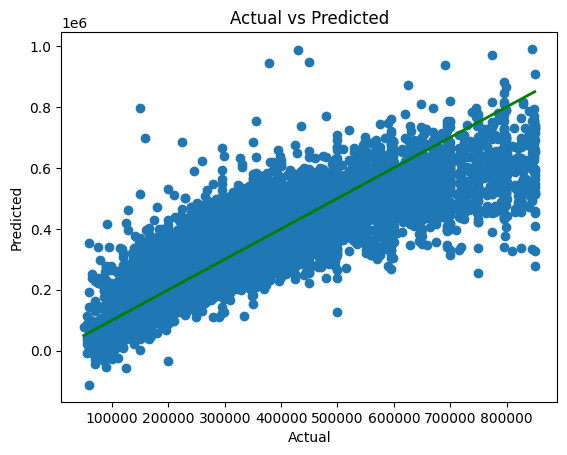

In [42]:
plt.scatter(y_test_l, y_pred_l)
plt.plot([y_test_l.min(), y_test_l.max()], [y_test_l.min(), y_test_l.max()], c='g', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

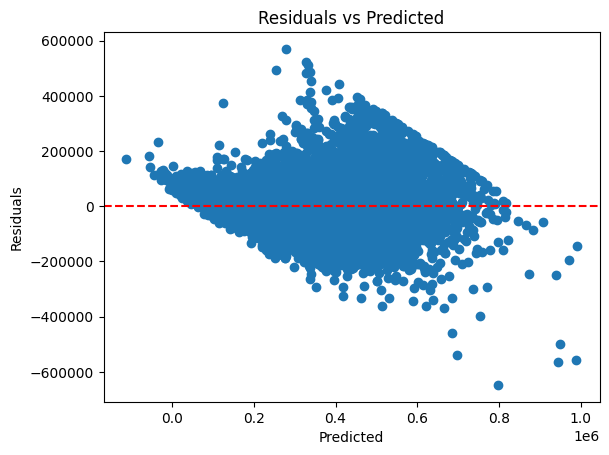

In [43]:
residuals_l = y_test_l - y_pred_l
plt.scatter(y_pred_l, residuals_l)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')
plt.show()

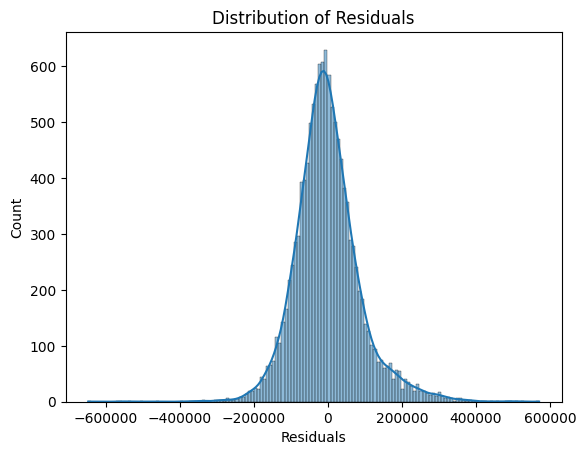

In [44]:

sns.histplot(residuals_l, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.show()